## Team Members 

1. Jessica Mutiso
2. Brian Waweru
3. Pamela Godia
4. Hellen Mwaniki

## 1. Project Overview 

This project aims to develop a natural language chatbot capable of generating human-like responses and understanding informal customer feedback expressed in English, Kenyan Swahili and Sheng. Designed for a startup expanding into the Kenyan market, the chatbot will help the company engage users more naturally and analyze feedback from social platforms and online conversations. By training on locally relevant dialogue data  including YouTube comments and Kenyan media the system will capture the linguistic and cultural nuances often missed by standard models.



## 1.1 Problem Statement
Startups entering new markets often struggle to understand customer feedback when it's expressed in local dialects or informal language. In Kenya, much of this communication occurs in Swahili and Sheng, which combine local slang, English, and Swahili in a fluid, often unstructured manner. Existing chatbot systems trained on formal English fail to grasp the tone, intent, or meaning behind such messages. This project aims to fill that gap by building a chatbot trained specifically on real-world Kenyan conversations to interpret and respond to customer queries and feedback with local context and relevance.

## 1.2 Objectives

- Collect and preprocess Kenyan user dialogue from YouTube, social media, and local content featuring Swahili and Sheng

- Fine-tune the chatbot with foundational data for conversational structure, while emphasizing local language patterns

- Build a sequence-to-sequence model  capable of handling informal, code-switched dialogue

- Evaluate the chatbot’s performance with emphasis on contextual relevance and local understanding

- Present a working prototype that simulates real customer feedback scenarios 

## 2.0 Overall EDA

!pip install matplotlib

In [2]:
!pip install matplotlib

   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.5 MB ? eta -:--:--
   ---- ----------------------------------- 0.8/7.5 MB 2.8 MB/s eta 0:00:03
   ------------ --------------------------- 2.4/7.5 MB 4.8 MB/s eta 0:00:02
   ------------------------------ --------- 5.8/7.5 MB 8.6 MB/s eta 0:00:01
   ---------------------------------------- 7.5/7.5 MB 8.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.5 MB 233.0 kB/s eta 0:00:05
   ------------- -------------------------- 0.5/1.5 MB 233.0 kB/s 

In [4]:
# importing relevant notebooks 
import pandas as pd 
import numpy as np
import random
import ast
import re
import matplotlib.pyplot as plt
import seaborn as sns
import string


## 2.1 Loading & Inspecting Datasets 

In [5]:
#Reading movie_lines data 

with open("original-data\movie_lines.txt", encoding='utf-8') as f:
    for _ in range(5):
        print(f.readline())


L1045 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ They do not!

L1044 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ They do to!

L985 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ I hope so.

L984 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ She okay?

L925 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ Let's go.



In [6]:
with open("original-data\pamela-youtube_comments.csv", encoding="utf-8") as f:
    for _ in range(5):
        print(f.readline())


video_id,comment

qlZM3McwO1Q,What an incredible victory. I agree the Kenyans should have been celebrated at the end. This was an incredible performance.

qlZM3McwO1Q,❤

qlZM3McwO1Q,“Claudia is an amazonian goddess with a beautiful clam!” - Bruce Wayne

qlZM3McwO1Q,Proud of my motherland Kenya ❤❤❤and Africa.at large



In [7]:
columns = ["VideoID", "comment"]

movie_titles = pd.read_csv(
    "original-data\pamela-youtube_comments.csv",
    sep=' \+\+\+\$\+\+\+ ',
    engine='python',
    names=columns,
    encoding='ISO-8859-1'
)

movie_titles.head()

,VideoID,comment
0,"video_id,comment",NaN
1,"qlZM3McwO1Q,What an incredible victory. I agre...",NaN
2,"qlZM3McwO1Q,â¤",NaN
3,"qlZM3McwO1Q,âClaudia is an amazonian goddess...",NaN
4,"qlZM3McwO1Q,Proud of my motherland Kenya â¤â...",NaN


In [8]:
with open ("original-data/brian_youtube_data_comments.csv", encoding ="utf-8") as f:
    for _ in range(5):
        print(f.readline())

Top Comment,Reply

"Apple missed the boat on AI OR... Apple is doing what it always does, waiting for others to prove a new technology, then ride in on their massive platform and take over. Time will tell which statement is true.",

"Who added the background music to the video its so fucking distracting. It sounds like nier automata bgm, that makes it impossible to focus",

16:26  FEMI KUTI !!! RAAHHH !!!,

"The greatest AI scam in history, is AI.",



In [9]:
columns = ["comment", "response"]

movie_titles = pd.read_csv(
    "original-data/brian_youtube_data_comments.csv",
    sep=' \+\+\+\$\+\+\+ ',
    engine='python',
    names=columns,
    encoding='ISO-8859-1'
)

movie_titles.head()

,comment,response
0,"ï»¿Top Comment,Reply",NaN
1,"""Apple missed the boat on AI OR... Apple is do...",NaN
2,"""Who added the background music to the video i...",NaN
3,"16:26 FEMI KUTI !!! RAAHHH !!!,",NaN
4,"""The greatest AI scam in history, is AI."",",NaN


In [10]:
## Reading the conversation data

with open("original-data\movie_conversations.txt", encoding="ISO-8859-1") as f:
    for _ in range(5):
        print(f.readline())


u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L194', 'L195', 'L196', 'L197']

u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L198', 'L199']

u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L200', 'L201', 'L202', 'L203']

u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L204', 'L205', 'L206']

u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L207', 'L208']



In [11]:
# Reading movie titles data 

with open ("original-data\movie_titles_metadata.txt", encoding= "ISO-8859-1") as f:
    for _ in range(5):
        print(f.readline())

m0 +++$+++ 10 things i hate about you +++$+++ 1999 +++$+++ 6.90 +++$+++ 62847 +++$+++ ['comedy', 'romance']

m1 +++$+++ 1492: conquest of paradise +++$+++ 1992 +++$+++ 6.20 +++$+++ 10421 +++$+++ ['adventure', 'biography', 'drama', 'history']

m2 +++$+++ 15 minutes +++$+++ 2001 +++$+++ 6.10 +++$+++ 25854 +++$+++ ['action', 'crime', 'drama', 'thriller']

m3 +++$+++ 2001: a space odyssey +++$+++ 1968 +++$+++ 8.40 +++$+++ 163227 +++$+++ ['adventure', 'mystery', 'sci-fi']

m4 +++$+++ 48 hrs. +++$+++ 1982 +++$+++ 6.90 +++$+++ 22289 +++$+++ ['action', 'comedy', 'crime', 'drama', 'thriller']



In [12]:
columns = ["MovieID", "Movie Title","Year", "Rating", "no_votes", "Genre"]

movie_titles = pd.read_csv(
    "original-data\movie_titles_metadata.txt",
    sep=' \+\+\+\$\+\+\+ ',
    engine='python',
    names=columns,
    encoding='ISO-8859-1'
)

movie_titles.head()

,MovieID,Movie Title,Year,Rating,no_votes,Genre
0,m0,10 things i hate about you,1999,6.9,62847,"['comedy', 'romance']"
1,m1,1492: conquest of paradise,1992,6.2,10421,"['adventure', 'biography', 'drama', 'history']"
2,m2,15 minutes,2001,6.1,25854,"['action', 'crime', 'drama', 'thriller']"
3,m3,2001: a space odyssey,1968,8.4,163227,"['adventure', 'mystery', 'sci-fi']"
4,m4,48 hrs.,1982,6.9,22289,"['action', 'comedy', 'crime', 'drama', 'thrill..."


In [13]:
movie_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MovieID      617 non-null    object 
 1   Movie Title  617 non-null    object 
 2   Year         617 non-null    object 
 3   Rating       617 non-null    float64
 4   no_votes     617 non-null    int64  
 5   Genre        617 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 29.0+ KB


In [14]:
# Reading raw_script data

with open ("original-data/raw_script_urls.txt", encoding = "ISO-8859=1") as f:
        for _ in range(5):
              print(f.readline())

m0 +++$+++ 10 things i hate about you +++$+++ http://www.dailyscript.com/scripts/10Things.html

m1 +++$+++ 1492: conquest of paradise +++$+++ http://www.hundland.org/scripts/1492-ConquestOfParadise.txt

m2 +++$+++ 15 minutes +++$+++ http://www.dailyscript.com/scripts/15minutes.html

m3 +++$+++ 2001: a space odyssey +++$+++ http://www.scifiscripts.com/scripts/2001.txt

m4 +++$+++ 48 hrs. +++$+++ http://www.awesomefilm.com/script/48hours.txt



### 2.1.1 Data Usage Explanation 


-  Youtube Dataset (scraped) - Help chatbot understand local expressions, slang, and questions users are actually asking

-  Cornell Dataset Teach dialog structure (turn-taking, responses), mostly in English

### 2.1.2 Merging Youtube Datasets

In [15]:

# Load both datasets without filtering columns yet
df1 = pd.read_csv("original-data/pamela-youtube_comments.csv")
df2 = pd.read_csv("original-data/brian_youtube_data_comments.csv")

# Print column names to inspect
print("pamela-youtube_comments.csv Columns:", df1.columns.tolist())
print("brian_youtube_data_comments.csv Columns:", df2.columns.tolist())


pamela-youtube_comments.csv Columns: ['video_id', 'comment']
brian_youtube_data_comments.csv Columns: ['Top Comment', 'Reply']


In [16]:
import pandas as pd

# Load both datasets
df1 = pd.read_csv("original-data/pamela-youtube_comments.csv")  
df2 = pd.read_csv("original-data/brian_youtube_data_comments.csv")  
# Clean df1: keep only 'comment' and drop nulls
df1 = df1[['comment']].dropna()
df1['response'] = None  # add placeholder column for consistency

# Clean df2: rename columns and drop nulls
df2 = df2.rename(columns={"Top Comment": "comment", "Reply": "response"})
df2 = df2[['comment', 'response']].dropna()

# Combine both
df_combined = pd.concat([df1, df2], ignore_index=True)

# Preview
print("Combined Dataset Shape:", df_combined.shape)
display(df_combined.sample(5))



Combined Dataset Shape: (26095, 2)


,comment,response
11738,Justice for baby Kingsley,None
20625,Yes teach her she has options...and walking aw...,None
4906,"May god grant this lady the peace she needs,ma...",None
17874,I love Lynn!,None
12733,Kamura,None


### 2.1.3 Comments length Distribution 

c:\Users\hp\anaconda3\envs\learn-env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128221 (\N{MEMO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


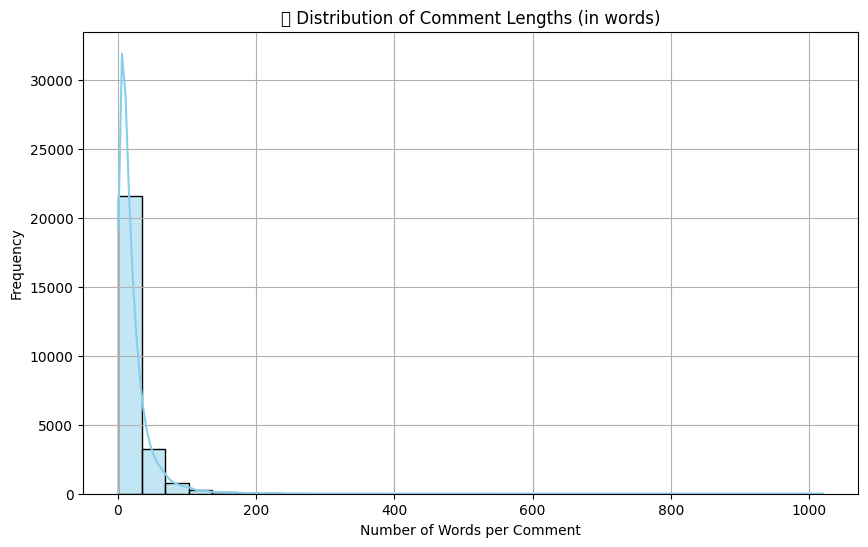

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add a new column: comment length (in words)
df_combined['comment_length'] = df_combined['comment'].apply(lambda x: len(str(x).split()))

# Plot distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_combined['comment_length'], bins=30, kde=True, color='skyblue')
plt.title("📝 Distribution of Comment Lengths (in words)")
plt.xlabel("Number of Words per Comment")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


### 2.1.3 Top words in comments 

C:\Users\hp\AppData\Local\Temp\ipykernel_24016\3391410998.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='viridis')


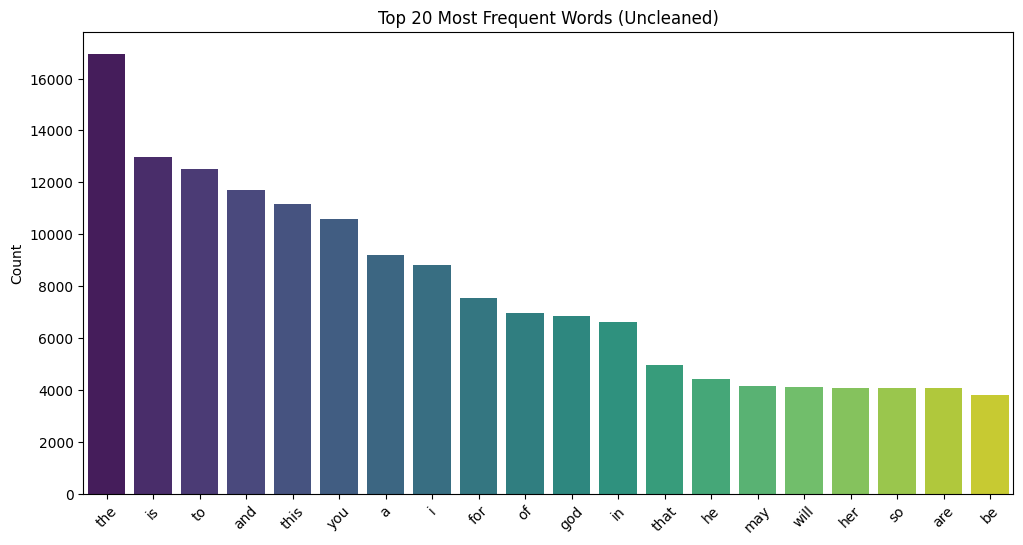

In [18]:
from collections import Counter
import string

# Combine all comments into one string
all_text = " ".join(df_combined['comment'].dropna().astype(str)).lower()

# Basic tokenization: split by space, remove punctuation
tokens = [word.strip(string.punctuation) for word in all_text.split()]


# Basic tokenization: split by space, remove punctuation
tokens = [word.strip(string.punctuation) for word in all_text.split()]
tokens = [word for word in tokens if word]  # remove empty

# Count frequencies
word_freq = Counter(tokens)
top_words = word_freq.most_common(20)

# Plot
words, counts = zip(*top_words)
plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(counts), palette='viridis')
plt.title("Top 20 Most Frequent Words (Uncleaned)")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()


## 2.2. Language Detection and preprocessing - Youtube data 

Here I want to check the amount of swahili / sheng in my youtube dataset to understand whether the data is efficient to use for training 


In [31]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
# Clear any corrupted cache
nltk.data.path.clear()

# Explicitly set download directory
nltk.data.path.append("C:/Users/hp/nltk_data")

# Re-download punkt
nltk.download('punkt', download_dir="C:/Users/hp/nltk_data")

[nltk_data] Downloading package punkt to C:/Users/hp/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
import nltk
from nltk.tokenize import word_tokenize

# Download both 'punkt' and 'punkt_tab'
nltk.download('punkt')
nltk.download('punkt_tab') # This is the crucial line to add/ensure

text = "This is a test."
print(word_tokenize(text))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:/Users/hp/nltk_data'
**********************************************************************


In [34]:
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')  # Just to be sure

text = "This is a test."
print(word_tokenize(text))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:/Users/hp/nltk_data'
**********************************************************************


In [35]:
# Preparing tokenized words list

from nltk.tokenize import word_tokenize
import string


all_text = " ".join(df_combined["comment"].dropna().astype(str).tolist())

# Tokenizing
tokens = word_tokenize(all_text.lower())

# Removing punctuations
tokens = [word for word in tokens if word not in string.punctuation]


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:/Users/hp/nltk_data'
**********************************************************************


In [ ]:
sheng_swahili_vocab = {
    "msee", "manze", "vile", "sasa", "buda", "nani", "kiasi", "si", "poa", "kwani",
    "hapo", "ushapata", "unadai", "ni", "aje", "nimeona", "noma", "mbogi", "beshte",
    "wasee", "ati", "ndio", "sana", "sijui", "nduthi", "wewe", "kuna", "niko", "leo",
    "kesho", "shida", "rafiki", "asante", "karibu", "mambo", "habari", "leo", "mzuri"
}


In [ ]:
from collections import Counter

# Countfing all words 
word_counts = Counter(tokens)

# Counting only Swahili/Sheng words
swahili_sheng_counts = {word: count for word, count in word_counts.items() if word in sheng_swahili_vocab}

# Total words and total Swahili/Sheng
total_words = sum(word_counts.values())
total_swahili_sheng = sum(swahili_sheng_counts.values())

print(f"Swahili/Sheng word count: {total_swahili_sheng}")
print(f"Total words: {total_words}")
print(f"Swahili/Sheng word percentage: {total_swahili_sheng / total_words:.2%}")


Swahili/Sheng word count: 2786
Total words: 602079
Swahili/Sheng word percentage: 0.46%


In [ ]:
from pprint import pprint

print("Top Swahili/Sheng words in dataset:")
pprint(sorted(swahili_sheng_counts.items(), key=lambda x: x[1], reverse=True)[:20])


Top Swahili/Sheng words in dataset:
[('ni', 870),
 ('sana', 518),
 ('wewe', 201),
 ('ndio', 166),
 ('si', 127),
 ('kuna', 121),
 ('ati', 116),
 ('sasa', 92),
 ('vile', 89),
 ('hapo', 85),
 ('kwani', 63),
 ('aje', 51),
 ('mambo', 41),
 ('leo', 40),
 ('sijui', 37),
 ('shida', 37),
 ('nani', 27),
 ('niko', 17),
 ('poa', 16),
 ('mzuri', 12)]


In [ ]:
pip install langdetect

^C
Note: you may need to restart the kernel to use updated packages.


### 2.2.1. Swahili words in the Yotube Combined Dataset

In [ ]:
from langdetect import detect, LangDetectException
from tqdm import tqdm
import re

tqdm.pandas()

def safe_detect(text):
    try:
        text = str(text).strip()
    
        cleaned = re.sub(r'[^a-zA-Z]', '', text)  # Removing digits and punctuation, keep only alphabetic characters
        if len(cleaned) < 5:
            return "unknown"
        return detect(text)
    except LangDetectException:
        return "unknown"

df_combined["language"] = df_combined["comment"].progress_apply(safe_detect)

# Count Swahili comments (ISO 639-1 code for Swahili is 'sw')
swahili_count = df_combined[df_combined["language"] == "sw"]["comment"].count()
total = df_combined["comment"].count()

print(f"Swahili comments: {swahili_count} / {total} ({(swahili_count/total):.2%})")


100%|██████████| 26095/26095 [01:44<00:00, 249.87it/s]

Swahili comments: 1821 / 26095 (6.98%)


In [ ]:
df_combined. head(10)

,comment,response,comment_length,language
0,What an incredible victory. I agree the Kenyan...,None,20,en
1,❤,None,1,unknown
2,“Claudia is an amazonian goddess with a beauti...,None,12,en
3,Proud of my motherland Kenya ❤❤❤and Africa.at ...,None,8,en
4,Damn,None,1,unknown
5,Kenya you should proud of yr self❤❤❤❤,None,7,en
6,Well done team Kenya❤,None,4,id
7,"This channel is racist! Report the channel, it...",None,24,en
8,"Congs Kenya, lots of love from Uganda",None,7,en
9,"Just WOW Kenya, what a run, what a stamina!",None,9,en


In [ ]:
# Phrases with combined Swahili and English (Code-switched comments)

def detect_code_switch(text):
    try:
        langs = detect_langs(text)
        lang_set = {lang.lang for lang in langs}
        return 'en' in lang_set and 'sw' in lang_set
    except LangDetectException:
        return False


In [ ]:
df_combined["code_switched"] = df_combined["comment"].astype(str).apply(detect_code_switch)


In [ ]:
percentage = (df_combined["code_switched"].sum() / len(df_combined)) * 100
print(f"{percentage:.2f}% of comments are code-switched.")


1.79% of comments are code-switched.


### 2.2.2 Findings from the Youtube data Inspection 

- There is Low prevalence of Swahili/Sheng (less than 0.5%) in the dataset.
- This likely meant most comments are in English, or the Swahili/Sheng vocabulary list is too small to capture what's actually Swahili/Sheng.

  Inspecting phrases with language switching show that : 
   - only a small fraction of the YouTube data contains both English and Swahili within the same comment.

### 2.2.3 Introducing dataset with more swahili words 

I decided to load the allenai/c4 dataset from Hugging Face.


In [ ]:
!pip install -q datasets


In [ ]:
from datasets import load_dataset

c:\Users\helle\anaconda3\envs\Learn-env2\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
swahili_data = load_dataset("allenai/c4", name="sw", split="train[:1%]")

Generating train split: 985654 examples [01:51, 8853.26 examples/s] 
Generating validation split: 994 examples [00:00, 6963.70 examples/s]


In [ ]:
# Converting sampled data to dataframe 

additional_sw_df = pd.DataFrame(swahili_data)

additional_sw_df.rename(columns={"text": "comment"}, inplace=True)

print(additional_sw_df.head())

                                             comment           timestamp  \
0  2016 - 75 Miaka Meiringen Air Base - AviaSpott... 2019-10-16 05:11:38   
1  JENIFFER KYAKA (ODAMA): J FIML 4 LIFE: Lulu Ha... 2018-07-22 08:54:40   
2  Imewekwa: July 13th, 2018\n“Marufuku watoto ku... 2019-06-19 13:00:43   
3  Kipengele Ngono na Ukahaba katika Cebu Wasicha... 2018-12-10 13:10:19   
4  KINGOTANZANIA:: HABARI, PICHA NA MATANGAZO: MA... 2017-08-20 13:33:24   

                                                 url  
0  https://www.aviaspotter.it/75-jahre-militarflu...  
1  http://odama1.blogspot.com/2015/12/lulu-haishi...  
2  http://ilejedc.go.tz/new/marufuku-watoto-kuone...  
3  https://sw.videochat.ph/sex-chat-roulette-phil...  
4  http://kingotanzania.blogspot.com/2012/10/maua...  


In [ ]:
# merging the combined youtube dataset with the additional swahili dataset 

df_combined_extended = pd.concat([df_combined, additional_sw_df], ignore_index=True)
                                 
# Shuffling to ensure better mixing of both sources(Prevents model from overfitting to the structure/order of the data)

df_combined_extended = df_combined_extended.sample(frac=1).reset_index(drop=True)


print(f"Original YouTube rows: {len(df_combined)}")
print(f"CC100 (Swahili) sample rows: {len(additional_sw_df)}")
print(f"Combined total rows: {len(df_combined_extended)}")
df_combined_extended.head()

Original YouTube rows: 26095
CC100 (Swahili) sample rows: 9857
Combined total rows: 35952


,comment,response,comment_length,language,code_switched,timestamp,url
0,Am sorry 😭😭😭😭,None,3.0,en,False,NaT,NaN
1,For serah to invite Maureen to stay in her hou...,None,65.0,en,False,NaT,NaN
2,Jinsi Raia wa Mynmar Wanavyokabiliana na Kupan...,NaN,NaN,NaN,NaN,2020-01-29 08:33:36,https://sw.globalvoices.org/2016/05/jinsi-raia...
3,This is so painful....I can't help but cry wit...,None,52.0,en,False,NaT,NaN
4,Condom inaposuluhisha ugoni! | JamiiForums | T...,NaN,NaN,NaN,NaN,2018-01-19 11:57:16,https://www.jamiiforums.com/threads/condom-ina...


## 2.3 Cleaning & Preprocessing combined dataset

In [ ]:
# Drop rows where 'comment' is completely missing
df_combined_extended = df_combined_extended.dropna(subset=['comment'])

# Strip, lowercase, and remove URLs & excess whitespace

def clean_comment(text):
    text = str(text).lower().strip()  
    text = re.sub(r"http\S+|www.\S+", "", text)  
    text = re.sub(r'\s+', ' ', text) 
    return text

df_combined_extended['comment'] = df_combined_extended['comment'].apply(clean_comment)

df_combined_extended. head(10)

,comment,response,comment_length,language,code_switched,timestamp,url
0,am sorry 😭😭😭😭,None,3.0,en,False,NaT,NaN
1,for serah to invite maureen to stay in her hou...,None,65.0,en,False,NaT,NaN
2,jinsi raia wa mynmar wanavyokabiliana na kupan...,NaN,NaN,NaN,NaN,2020-01-29 08:33:36,https://sw.globalvoices.org/2016/05/jinsi-raia...
3,this is so painful....i can't help but cry wit...,None,52.0,en,False,NaT,NaN
4,condom inaposuluhisha ugoni! | jamiiforums | t...,NaN,NaN,NaN,NaN,2018-01-19 11:57:16,https://www.jamiiforums.com/threads/condom-ina...
5,"i agree, both have serious esteem issues",None,7.0,en,False,NaT,NaN
6,juventus special thread | jamiiforums | the ho...,NaN,NaN,NaN,NaN,2017-01-23 19:11:59,https://www.jamiiforums.com/threads/juventus-s...
7,viongozi wa nchi za maziwa makuu wawekea vikwa...,NaN,NaN,NaN,NaN,2017-01-21 08:29:28,http://www.voaswahili.com/a/viongozi-wa-nchi-z...
8,"that is a devil 👿 of a man,n the way the baby ...",None,36.0,en,False,NaT,NaN
9,"ooh god of mercy, may your will be done in hea...",None,25.0,en,False,NaT,NaN


In [ ]:
# Recalculating comment length (Helps analyze and filter comments (e.g., remove extremely short or long ones).


df_combined_extended['comment_length'] = df_combined_extended['comment'].apply(lambda x: len(x.split()))

# Detecting language only if missing
def safe_detect(text):
    try:
        return detect(text)
    except LangDetectException:
        return "unknown"

df_combined_extended['language'] = df_combined_extended['language'].fillna(df_combined_extended['comment'].apply(safe_detect))



In [ ]:
# Filling  missing response column with None (if it exists) - This helps create a language-specific chatbot that doesn’t train on unrelated or noisy data

if 'response' in df_combined_extended.columns:
    df_combined_extended['response'] = df_combined_extended['response'].fillna('no_response')


# Filling  missing code-switched flags with False
if 'code_switched' in df_combined_extended.columns:
    df_combined_extended['code_switched'] = df_combined_extended['code_switched'].fillna(False)

# dropping  unnecessary columns 
df_combined_extended = df_combined_extended.drop(columns=['timestamp', 'url'], errors='ignore')

# 8. Resetting index
df_combined_extended.reset_index(drop=True, inplace=True)

df_combined_extended.head(15)
## Preparing input-reponse pairs from the Cornell dataset.



,comment,response,comment_length,language,code_switched
0,am sorry 😭😭😭😭,no_response,3,en,False
1,for serah to invite maureen to stay in her hou...,no_response,65,en,False
2,jinsi raia wa mynmar wanavyokabiliana na kupan...,no_response,382,sw,False
3,this is so painful....i can't help but cry wit...,no_response,52,en,False
4,condom inaposuluhisha ugoni! | jamiiforums | t...,no_response,307,sw,False
5,"i agree, both have serious esteem issues",no_response,7,en,False
6,juventus special thread | jamiiforums | the ho...,no_response,1629,sw,False
7,viongozi wa nchi za maziwa makuu wawekea vikwa...,no_response,392,sw,False
8,"that is a devil 👿 of a man,n the way the baby ...",no_response,36,en,False
9,"ooh god of mercy, may your will be done in hea...",no_response,25,en,False


In [ ]:

# Defining file paths
lines_path = "original-data/movie_lines.txt"
conversations_path = "original-data/movie_conversations.txt"


# Loading  and parsing  movie_lines.txt
lines = {}
with open(lines_path, encoding='ISO-8859-1') as f:
    for line in f:
        parts = line.strip().split(" +++$+++ ")
        if len(parts) == 5:
            line_id, _, _, _, text = parts
            lines[line_id] = text


# Loading and parsing movie_conversations.txt

conversations = []
with open(conversations_path, encoding='ISO-8859-1') as f:
    for line in f:
        parts = line.strip().split(" +++$+++ ")
        if len(parts) == 4:
            utterance_ids = ast.literal_eval(parts[3])  # Converting string list to actual list
            conversations.append(utterance_ids)



In [ ]:
# Creating comment-response pairs

pairs = []
for conv in conversations:
    for i in range(len(conv) - 1):
        input_id = conv[i]
        response_id = conv[i + 1]

        input_text = lines.get(input_id)
        response_text = lines.get(response_id)

        if input_text and response_text:
            pairs.append((input_text, response_text))

# Creating a DataFrame
df_cornell = pd.DataFrame(pairs, columns=["comment", "response"])
print(df_cornell.head())


                                             comment  \
0  Can we make this quick?  Roxanne Korrine and A...   
1  Well, I thought we'd start with pronunciation,...   
2  Not the hacking and gagging and spitting part....   
3  You're asking me out.  That's so cute. What's ...   
4  No, no, it's my fault -- we didn't have a prop...   

                                            response  
0  Well, I thought we'd start with pronunciation,...  
1  Not the hacking and gagging and spitting part....  
2  Okay... then how 'bout we try out some French ...  
3                                         Forget it.  
4                                           Cameron.  


### 2.3.1. Cleaning paired Dataframe

In [ ]:

def clean_text(text, remove_emojis=True):
    if pd.isnull(text):
        return ""
        text = text.lower()   # Lowercase

    text = text.translate(str.maketrans('', '', string.punctuation))     # Removing punctuation

    text = re.sub(r'\s+', ' ', text).strip()     # Removing extra whitespace

    return text

df_cornell['comment'] = df_cornell['comment'].apply(lambda x: clean_text(x))
df_cornell['response'] = df_cornell['response'].apply(lambda x: clean_text(x))

df_cornell = df_cornell[(df_cornell['comment'].str.strip() != '') & (df_cornell['response'].str.strip() != '')] #Dropping rows with empty comments or responses

print(df_cornell.sample(5))


                                                  comment  \
46715                      From the club You didnt answer   
134069  Okay Im delighted to have someone to talk to a...   
136570                           250000 right off the top   
217458                                   Who did Mrs Feur   
73975                                          Smile good   

                                                 response  
46715   I must have fallen asleep I was asleep when yo...  
134069                      Im such a heel Howd you guess  
136570                                     Is he straight  
217458                               Maybe Point isnot me  
73975                                                 Yes  


# 3 Modeling

# 3.1. TF-IDF + Cosine Similarity Chatbot 
A simple NLP chatbot using TF-IDF and cosine similarity for conversational response matching.

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import re
import ast
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
#Load the Cornell Movie Dialogs Dataset
conversations = pd.read_csv('original-data/movie_conversations.txt',sep=r'\s*\+\+\+\$\+\+\+\s*',engine='python', names=["character1", "character2", "movieID", "utteranceIDs"],encoding='iso-8859-1')
lines = pd.read_csv('original-data/movie_lines.txt',sep=r'\s*\+\+\+\$\+\+\+\s*',engine='python',names=["lineID", "characterID", "movieID", "character", "text"],encoding='iso-8859-1')

yt1= pd.read_csv('original-data/brian_youtube_data_comments.csv')
yt2= pd.read_csv('original-data/pamela-youtube_comments.csv')

# Convert utteranceIDs from string to list
conversations['utteranceIDs'] = conversations['utteranceIDs'].apply(ast.literal_eval)

In [ ]:
#Extract Conversational Pairs (input-response)
line_dict = dict(zip(lines['lineID'], lines['text']))

pairs = []

for conv in conversations['utteranceIDs']:
    for i in range(len(conv) - 1):
        # Get both lines from the dictionary
        in_line = line_dict.get(conv[i])
        out_line = line_dict.get(conv[i+1])

        # Ensure both exist and are strings
        if isinstance(in_line, str) and isinstance(out_line, str):
            in_line = in_line.strip()
            out_line = out_line.strip()
            if in_line and out_line:
                pairs.append((in_line, out_line))

# Create DataFrame
chat_df = pd.DataFrame(pairs, columns=["input", "response"])

# Sanity check
print(f"✅ Extracted {len(chat_df)} conversation pairs.")
if not chat_df.empty:
    print(chat_df.sample(5))
else:
    print("❌ No valid pairs found.")

✅ Extracted 221282 conversation pairs.
                                                    input  \
92511   Oh, okay, forgive me.  Your neighbors are here...   
77948                                 So you're a lawyer.   
18704                                             Oh, no.   
7333    He suspects I know something. I think he was s...   
128637  Don't recognize him. You were trapped by Morga...   

                                                 response  
92511              Exactly what I mean.  It's all ruined.  
77948     That's right. What are you doing in Bodega Bay?  
18704                      I knew you'd understand. Here.  
7333                                                Why?!  
128637  ...Gawain and Perceval, Bors and Bohort, Carad...  


In [ ]:
#Preprocess the Text
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

chat_df['clean_input'] = chat_df['input'].apply(clean_text)

In [ ]:
# Create TF-IDF Matrix for User Inputs
vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words='english')
tfidf_matrix = vectorizer.fit_transform(chat_df['clean_input'])

In [ ]:
# Chatbot Function Using Cosine Similarity
def chatbot_response(user_input):
    cleaned_input = clean_text(user_input)
    user_vec = vectorizer.transform([cleaned_input])
    similarities = cosine_similarity(user_vec, tfidf_matrix).flatten()
    best_match_idx = similarities.argmax()
    if similarities[best_match_idx] > 0:
        return chat_df.iloc[best_match_idx]['response']
    else:
        return "I'm not sure how to respond to that."

In [ ]:
import gradio as gr

# Function that takes user input and returns chatbot response
def chat_with_bot(user_input):
    user_input_vector = vectorizer.transform([user_input])
    similarity = cosine_similarity(user_input_vector, tfidf_matrix)
    best_match_idx = similarity.argmax()
    return chat_df.iloc[best_match_idx]["response"]

# Create Gradio interface
iface = gr.Interface(fn=chat_with_bot,
                     inputs=gr.Textbox(lines=2, placeholder="Type a message..."),
                     outputs="text",
                     title="TF-IDF and cosine similarity baseline model",
                     description="Ask something and get a response based on similarity!")

iface.launch()


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


### 3.1.2. Why This Baseline Model Needs Further Advancement

The current chatbot uses a TF-IDF (Term Frequency-Inverse Document Frequency) vectorizer combined with cosine similarity to find the most relevant response to a user's input. While this method is simple and effective as a baseline, it has several limitations that make it unsuitable for production-level conversational AI:

#### 1. **Lack of Context Awareness**
The model treats each input-response pair as independent. It doesn't remember prior messages in the conversation, making it unable to maintain coherent multi-turn interactions.

#### 2. **No Semantic Understanding**
TF-IDF relies purely on the frequency of words. It doesn’t understand the meaning behind words or recognize synonyms. For instance, "How are you doing?" and "How's it going?" might be treated as unrelated.

#### 3. **Rigid Matching**
The model will fail to respond well to slightly rephrased, paraphrased, or typo-ridden inputs, since it depends on exact or partial word overlap.

#### 4. **Scalability Issues**
As the dataset grows, cosine similarity computations become slower, especially with larger TF-IDF matrices. This limits performance in real-time applications.

#### 5. **No Personalization or Dynamic Learning**
The model cannot adapt to different users, preferences, or conversation styles. It also doesn’t improve over time unless retrained.


### 3.1.3.  Future Improvements

To build a more intelligent and natural chatbot

This baseline model is a great starting point for understanding chatbot mechanics, but it's only the first step toward building a truly intelligent conversational agent.


## 4 Advanced Modeling 
 

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
df_combined_extended.head(5)

,comment,response,comment_length,language,code_switched
0,am sorry 😭😭😭😭,no_response,3,en,False
1,for serah to invite maureen to stay in her hou...,no_response,65,en,False
2,jinsi raia wa mynmar wanavyokabiliana na kupan...,no_response,382,sw,False
3,this is so painful....i can't help but cry wit...,no_response,52,en,False
4,condom inaposuluhisha ugoni! | jamiiforums | t...,no_response,307,sw,False


In [ ]:
df_cornell.head(5)

,comment,response
0,Can we make this quick Roxanne Korrine and And...,Well I thought wed start with pronunciation if...
1,Well I thought wed start with pronunciation if...,Not the hacking and gagging and spitting part ...
2,Not the hacking and gagging and spitting part ...,Okay then how bout we try out some French cuis...
3,Youre asking me out Thats so cute Whats your n...,Forget it
4,No no its my fault we didnt have a proper intr...,Cameron


In [ ]:
df_combined_extended_clean = df_combined_extended[df_combined_extended['response'] != 'no_response'].copy()
df_combined_extended_clean = df_combined_extended_clean[['comment', 'response']].rename(columns={'comment': 'prompt'})


In [ ]:
# Renaming df_cornell columns 

df_cornell_clean = df_cornell.rename(columns={'comment': 'prompt'})


In [ ]:
# Combining datasets 
df_all = pd.concat([df_cornell_clean, df_combined_extended_clean], ignore_index=True)
df_all = df_all.dropna(subset=['prompt', 'response']).reset_index(drop=True)


### 4.1. Retrieval Model

Explaining the retrieval  model 

Load a sentence embedding model (all-MiniLM-L6-v2).

Encoded the prompts (questions) into vector embeddings.

Store those embeddings in a FAISS index.

    What is FAISS Index?
    FAISS stands for Facebook AI Similarity Search. It's an open-source library developed by Meta AI for efficient similarity search and clustering of dense vectors.
    - It's super fast even with millions of vectors
    - It supports approximate nearest neighbors, which trade a tiny bit of accuracy for huge speed

Load the responses in a list.

At runtime, when a user sends a message, the model:

Embeds the user message,

Compares it to the saved vectors (using cosine similarity or L2 distance),

Returns the most similar response.

| Data Source            | Role in Retrieval Model                                                                    |
| ---------------------- | ------------------------------------------------------------------------------------------ |
| YouTube & Hugging Face | Adds **Swahili/mixed-language examples** to improve understanding and vocabulary coverage. |
| Movie Dialogues        | Adds **conversational flow**, helps bot feel more natural.                                 |
| Your Pairing Work      | Created **prompt-response pairs** for the model to compare against.                        |
| Sentence Transformer   | Turns all inputs into **meaning-based vectors** (even across languages).                   |




In [ ]:
!pip install faiss-cpu


  Using cached faiss_cpu-1.11.0.post1-cp311-cp311-win_amd64.whl.metadata (5.1 kB)
Using cached faiss_cpu-1.11.0.post1-cp311-cp311-win_amd64.whl (14.9 MB)


In [ ]:
import faiss


In [ ]:
#model
#a pre-trained sentence transformer model called all-MiniLM-L6-v2

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

corpus_embeddings = model.encode(df_all['prompt'].tolist(), show_progress_bar=True)
corpus_embeddings = np.array(corpus_embeddings).astype('float32')

# Creating FAISS index for fast similarity search
dimension = corpus_embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)
index.add(corpus_embeddings)


Batches: 100%|██████████| 6930/6930 [44:50<00:00,  2.58it/s]  


In [ ]:
import json

# Save FAISS index
faiss.write_index(index, 'chatbot_index.faiss')

# Save responses to JSON 
with open('chatbot_responses.json', 'w', encoding='utf-8') as f:
    json.dump(df_all['response'].tolist(), f, ensure_ascii=False, indent=2)

print("Retrieval chatbot setup complete")


Retrieval chatbot setup complete


In [ ]:
# Load the saved responses

with open('chatbot_responses.json', 'r', encoding='utf-8') as f:
    responses = json.load(f)


In [ ]:
def get_response(user_input, top_k=1):
    query_embedding = model.encode([user_input]).astype('float32')
    distances, indices = index.search(query_embedding, top_k)
    return [responses[i] for i in indices[0]]


In [ ]:
user_input = "how are you feeling today?"
top_response = get_response(user_input, top_k=1)

print("User:", user_input)
print("Bot:", top_response[0])


User: how are you feeling today?
Bot: I feel much better Thank you for asking And you


In [ ]:
test_inputs = [
    "Hi there!",
    "What's your name?",
    "Tell me something funny",
    "Habari yako?",
    "Unaweza kunisaidia?",
    "I feel sad today"
]

for inp in test_inputs:
    print(f"\nUser: {inp}")
    print("Bot:", get_response(inp)[0])



User: Hi there!
Bot: Hi

User: What's your name?
Bot: Leeloo Minai LekararibaLaminaiTchai Ekbat De Sebat

User: Tell me something funny
Bot: What the hell

User: Habari yako?
Bot: Good Very good

User: Unaweza kunisaidia?
Bot: No Our informer in McCluskeys precinct Tonight at 800 he signed out for Louis Restaurant in the Bronx Anyone know it

User: I feel sad today
Bot: You know how you feel when you come out of a bad hangover Like your eyes can open a little bit more


In [ ]:

def get_response(user_input, top_k=1):
    try:
        # Detect language (Swahili, English, etc.)
        lang = detect(user_input)
    except:
        lang = "unknown"

    # Print or log detected language (optional)
    print(f"Detected language: {lang}")

    # Convert input to vector and search for nearest response
    query_embedding = model.encode([user_input]).astype('float32')
    distances, indices = index.search(query_embedding, top_k)

    # Fetch and return responses
    return [responses[i] for i in indices[0]]


In [ ]:
# Test input examples
test_inputs = [
    "How are you doing today?",          # English
    "Habari yako?",                      # Swahili
    "Naomba refund ya order yangu",     # Code-switch (Swahili + English)
    "Je, unaweza kuniambia delivery iko wapi?",  # Mixed
]

for user_input in test_inputs:
    responses_output = get_response(user_input)
    print(f"\nUser: {user_input}")
    print(f"Bot: {responses_output[0]}")


Detected language: en

User: How are you doing today?
Bot: Its another day I think Im alright
Detected language: sw

User: Habari yako?
Bot: Good Very good
Detected language: id

User: Naomba refund ya order yangu
Bot: Tuttle
Detected language: sw

User: Je, unaweza kuniambia delivery iko wapi?
Bot: You know exactly where they are


## 4.2. Fine tuning 

### 4.2.1. Loading Sample data

In [3]:
from datasets import load_dataset

ds = load_dataset("MohammadOthman/mo-customer-support-tweets-945k", split="train")

# Preview first item
print(ds[0])


c:\Users\helle\anaconda3\envs\Learn-env2\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{'output': 'I would love the chance to review the account and provide assistance.', 'input': 'is the worst customer service'}


In [4]:
from sentence_transformers import InputExample

dataset = load_dataset("MohammadOthman/mo-customer-support-tweets-945k", split="train")
sampled_dataset = dataset.shuffle(seed=42).select(range(5000))

# Creating InputExamples for fine-tuning
train_samples = [
    InputExample(texts=[item["input"], item["output"]])
    for item in sampled_dataset
    if item["output"] is not None
]


In [ ]:
!pip install "accelerate>=0.26.0"
 
# a hugging face library often used when fine-tuning models like transformers 

  Using cached accelerate-1.9.0-py3-none-any.whl.metadata (19 kB)
Using cached accelerate-1.9.0-py3-none-any.whl (367 kB)


In [5]:
from sentence_transformers import InputExample

# Example training data: a list of InputExample objects
train_samples = [
    InputExample(texts=["How are you?", "How do you do?"]),
    InputExample(texts=["What's your name?", "May I know your name?"]),
    InputExample(texts=["I love pizza", "Pizza is my favorite"]),
]


In [7]:
from sentence_transformers import SentenceTransformer, losses
from torch.utils.data import DataLoader

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
train_dataloader = DataLoader(train_samples, shuffle=True, batch_size=16)
train_loss = losses.MultipleNegativesRankingLoss(model)

model.fit(
    train_objectives=[(train_dataloader, train_loss)],
    epochs=3,
    warmup_steps=100
)



c:\Users\helle\anaconda3\envs\Learn-env2\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss


In [8]:
model.save("finetuned_customer_care_model")


In [10]:
# Example test input (user query)
user_input = "I need help tracking my order"

# Candidate responses (these can come from your response dataset or a list)
candidate_responses = [
    "Sure, let me check the status of your order.",
    "Please provide your order number so I can assist you.",
    "Try rebooting your device.",
    "That's not something we can help with."
]

# Encoding the input and candidates
from numpy import dot
from numpy.linalg import norm

user_embedding = model.encode(user_input)
response_embeddings = model.encode(candidate_responses)

# Computing cosine similarities
def cosine_similarity(a, b):
    return dot(a, b) / (norm(a) * norm(b))

similarities = [cosine_similarity(user_embedding, resp_emb) for resp_emb in response_embeddings]

best_index = similarities.index(max(similarities))
print("User:", user_input)
print("Bot:", candidate_responses[best_index])


User: I need help tracking my order
Bot: Sure, let me check the status of your order.


## 4.3. Evaluation 

### 4.3.1. Semantic Similarity Evaluation

In [11]:
from sentence_transformers.evaluation import EmbeddingSimilarityEvaluator

# Sample sentence pairs and scores 
sentences1 = [
    "Where is my order?", 
    "Your service is terrible", 
    "Can I get a refund?", 
    "Thank you for the help"
]

sentences2 = [
    "The delivery should arrive today.", 
    "I’m sorry to hear that, let me assist.", 
    "Sure, let me process your refund now.", 
    "Glad we could help!"
]

# Human-labeled similarity scores
scores = [0.9, 0.8, 1.0, 0.95]

# Evaluate
evaluator = EmbeddingSimilarityEvaluator(sentences1, sentences2, scores)
model.evaluate(evaluator)


{'pearson_cosine': 0.9224705839869486, 'spearman_cosine': 0.7999999999999999}

### 4.3.2. Retrieval-Based Evaluation

In [ ]:
from sentence_transformers import util

# Corpus of known responses (like chatbot answers)
corpus = [
    "I'm checking on your order right now.",
    "Sorry to hear that, let me look into it.",
    "Your refund has been processed.",
    "We're happy to assist you anytime!",
    "Please allow 24 hours for delivery."
]

corpus_embeddings = model.encode(corpus, convert_to_tensor=True)

# Example user queries
queries = [
    "Where is my delivery?",
    "This service sucks.",
    "I want a refund",
    "Thanks for the help!",
    "How long should I wait?"
]

# Evaluating each query
for query in queries:
    query_embedding = model.encode(query, convert_to_tensor=True)
    hits = util.semantic_search(query_embedding, corpus_embeddings, top_k=1)
    top_hit = hits[0][0]
    print(f"\nQuery: {query}")
    print(f"→ Top Match (Score: {top_hit['score']:.2f}): {corpus[top_hit['corpus_id']]}")



Query: Where is my delivery?
→ Top Match (Score: 0.55): Please allow 24 hours for delivery.

Query: This service sucks.
→ Top Match (Score: 0.32): Sorry to hear that, let me look into it.

Query: I want a refund
→ Top Match (Score: 0.70): Your refund has been processed.

Query: Thanks for the help!
→ Top Match (Score: 0.33): We're happy to assist you anytime!

Query: How long should I wait?
→ Top Match (Score: 0.16): Please allow 24 hours for delivery.


### 4.3.3 Further Training 

In [23]:
from sentence_transformers import InputExample
import random

# Swahili-only, English-only, and mixed-language ecommerce dialogues
swahili_inputs = [
    ("Je, ninaweza kulipa kwa M-Pesa?", "Ndiyo, tunakubali malipo kupitia M-Pesa."),
    ("Nimesubiri siku tatu sasa", "Tunaomba radhi, tutakujulisha mara moja kuhusu agizo lako."),
    ("Naomba refund", "Tunaomba radhi kwa usumbufu. Pesa zako zitarudishwa hivi karibuni."),
    ("Nataka kubadilisha agizo langu", "Tafadhali tuma ombi lako la mabadiliko kupitia akaunti yako."),
    ("Agizo langu halijafika", "Tunaomba radhi, tunaifuatilia mara moja."),
    ("Ninahitaji msaada na akaunti yangu", "Tafadhali elezea shida yako na tutakusaidia."),
    ("Je, kuna ofa maalum?", "Ndiyo, tuna punguzo la asilimia 10 wiki hii."),
    ("Huduma yenu ni bora", "Asante sana kwa maoni yako chanya."),
    ("Nimepokea bidhaa isiyo sahihi", "Tunaomba radhi, tafadhali rudisha bidhaa na tutatuma mpya."),
    ("Je, mnafanya usafirishaji kimataifa?", "Ndiyo, tunasafirisha kimataifa kwa ada ya ziada."),
]

english_inputs = [
    ("Where is my package?", "Your order is on the way and will arrive within 24 hours."),
    ("Thanks!", "You’re welcome! Let us know if you need anything else."),
    ("I want to change my order", "Sure, you can update your order in your account settings."),
    ("My item arrived damaged", "We're sorry to hear that. Please send a photo and we'll replace it."),
    ("Do you offer express shipping?", "Yes, we offer same-day delivery in select areas."),
    ("How do I track my order?", "You can track your order using the tracking link sent to your email."),
    ("I forgot my password", "Click on ‘Forgot Password’ on the login page to reset it."),
    ("Can I return an item?", "Yes, you can return items within 14 days."),
    ("Do you offer discounts?", "Yes, check our homepage for current promotions."),
    ("Is this item in stock?", "Yes, it's currently available."),
]

mixed_inputs = [
    ("Nataka kuplace order lakini site haifunguki", "Tunaomba radhi, jaribu tena baada ya dakika chache."),
    ("How much is shipping to Nairobi?", "Standard shipping to Nairobi is KSh 250."),
    ("Agizo langu limechelewa", "We're sorry for the delay, your package is on its way."),
    ("Is it possible to cancel my agizo?", "Yes, you can cancel your order within 30 minutes."),
    ("Can I pay via M-Pesa or card?", "Yes, both M-Pesa and card payments are accepted."),
    ("Je, kuna warranty kwa hizi bidhaa?", "Yes, all electronics come with a 1-year warranty."),
    ("Nimesahau password ya akaunti", "Click on ‘Forgot Password’ on the login screen."),
    ("Delivery inachukua muda gani?", "It takes 1-2 business days within Nairobi."),
    ("I need a refund for my last agizo", "Please contact support and we’ll initiate a refund."),
    ("Je, hii item iko available?", "Yes, it's available and ready to ship."),
]

# Convert to InputExample
all_samples = [
    InputExample(texts=[q, a])
    for q, a in (swahili_inputs + english_inputs + mixed_inputs)
]

# Multiply and shuffle to get ~510 samples
train_samples = all_samples * 17
random.shuffle(train_samples)


In [35]:
from sentence_transformers import SentenceTransformer, losses, models
from torch.utils.data import DataLoader

# Loading transformer model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

train_dataloader = DataLoader(train_samples, shuffle=True, batch_size=16)

# Loss function
train_loss = losses.MultipleNegativesRankingLoss(model)

# Fine-tuning model
model.fit(
    train_objectives=[(train_dataloader, train_loss)],
    epochs=3,
    warmup_steps=100,
    show_progress_bar=True
)


c:\Users\helle\anaconda3\envs\Learn-env2\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss


In [36]:
model.save('./ecom-mixedlang-model')

In [37]:
query = "Je, mnapokea Visa Card?"
corpus = ["Yes, we accept Visa Card.", "No, only M-Pesa is allowed.", "You can use credit or debit cards."]

from sentence_transformers import util

query_embedding = model.encode(query, convert_to_tensor=True)
corpus_embeddings = model.encode(corpus, convert_to_tensor=True)

hits = util.semantic_search(query_embedding, corpus_embeddings, top_k=2)
print("Best Match:", corpus[hits[0][0]['corpus_id']])


Best Match: Yes, we accept Visa Card.


In [38]:
# loading Fine tuned model 

from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('./ecom-mixedlang-model')


In [39]:
# Defining Knowledge based 

# Define answers the bot can return
corpus = [
    "Ndiyo, tunakubali malipo kupitia M-Pesa.",
    "Your order is on the way and will arrive within 24 hours.",
    "Tunaomba radhi kwa usumbufu. Pesa zako zitarudishwa hivi karibuni.",
    "You’re welcome! Let us know if you need anything else.",
    "Tunaomba radhi, tutakujulisha mara moja kuhusu agizo lako.",
    "Yes, both M-Pesa and card payments are accepted.",
    "Click on ‘Forgot Password’ on the login screen.",
    "It takes 1-2 business days within Nairobi.",
    "Tafadhali tuma ombi lako la mabadiliko kupitia akaunti yako.",
    "Yes, all electronics come with a 1-year warranty.",
    "Tunaomba radhi, jaribu tena baada ya dakika chache.",
]

# Encode the corpus once
corpus_embeddings = model.encode(corpus, convert_to_tensor=True)


In [40]:
#Defining  Response Function

def chat_response(user_query):
    query_embedding = model.encode(user_query, convert_to_tensor=True)
    hits = util.semantic_search(query_embedding, corpus_embeddings, top_k=1)
    best_idx = hits[0][0]['corpus_id']
    return corpus[best_idx]


In [41]:
# Gradio Interface 

import gradio as gr

with gr.Blocks() as demo:
    gr.Markdown("# 🛍️ Ecommerce Support Bot")
    chatbot = gr.Chatbot()
    with gr.Row():
        txt = gr.Textbox(placeholder="Ask a question in Swahili, English, or both...", label="Your Message")
        send_btn = gr.Button("Send")

    def respond(message, chat_history):
        reply = chat_response(message)
        chat_history.append((message, reply))
        return chat_history, ""

    send_btn.click(respond, [txt, chatbot], [chatbot, txt])

demo.launch()


C:\Users\helle\AppData\Local\Temp\ipykernel_15584\3967544464.py:7: UserWarning: You have not specified a value for the `type` parameter. Defaulting to the 'tuples' format for chatbot messages, but this is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style dictionaries with 'role' and 'content' keys.
  chatbot = gr.Chatbot()


* Running on local URL:  http://127.0.0.1:7862
* To create a public link, set `share=True` in `launch()`.
